# Crime Analysis Neural Network

#### Purpose:
The purpose of this notebook is to look specifically at Neural Networks which can model more complex relationships and interactions between features. The purpose of using this specific analysis is due to the complex and categorical nature of the features of the data set read in via the pandas library. The hope is that neural network provides more accurate models for the previously explored analysis. 

### Read in CSV

In [1]:
import pandas as pd
csv_file_path = '/Users/lindseysullivan/Documents/School/Kansas-City-Crime-Analysis/Data/Data_Sets/KCPD-5-Year-Analysis-Model.csv'
df = pd.read_csv(csv_file_path)

## Neural Network - Multi-Label 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Feature and Target Setup
features = df[['sin_Quarter', 'cos_Quarter', 'sin_Months', 'cos_Months', 
               'sin_DayOfWeek', 'cos_DayOfWeek', 'Offense_Rank', 'age_range_encoded']]
target = df[['Is_Violent', 'Is_Property_Crime', 'Is_Crimes_Against_Person', 'Is_Crimes_Against_Society']]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Compile and Train Model

In [7]:
# Neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50


28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 354us/step - accuracy: 0.8801 - loss: 0.2041 - val_accuracy: 0.9948 - val_loss: 0.0144
Epoch 2/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 342us/step - accuracy: 0.9943 - loss: 0.0131 - val_accuracy: 0.9943 - val_loss: 0.0107
Epoch 3/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 343us/step - accuracy: 0.9943 - loss: 0.0093 - val_accuracy: 0.9960 - val_loss: 0.0075
Epoch 4/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 339us/step - accuracy: 0.9949 - loss: 0.0079 - val_accuracy: 0.9965 - val_loss: 0.0043
Epoch 5/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 340us/step - accuracy: 0.9956 - loss: 0.0057 - val_accuracy: 0.9958 - val_loss: 0.0034
Epoch 6/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 338us/step - accuracy: 0.9961 - loss: 0.0047 - val_accuracy: 0.9964 - val_loss: 0.0029
Epoch 7/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 339us/step - accuracy: 0.9964 - loss: 0.0042 - val_accuracy: 0.9963 - val_loss: 0.0034
Epoch 8/50
28499/28499 ━━━━━━━━━━━━━━━━━━━━ 10s 340us/step - accur

### Model Evaluation

In [11]:

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix

# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Model Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

# Multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print(conf_matrix)



2784/2784 ━━━━━━━━━━━━━━━━━━━━ 1s 218us/step
2784/2784 ━━━━━━━━━━━━━━━━━━━━ 1s 208us/step - accuracy: 0.9971 - loss: 3.8488e-07
Model Accuracy: 0.9972
Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
[[[74624     0]
  [    0 14434]]

 [[59529     0]
  [    0 29529]]

 [[77757     0]
  [    0 11301]]

 [[40830     0]
  [    0 48228]]]


### Loss Curve
Plotting the train and validation loss over epochs

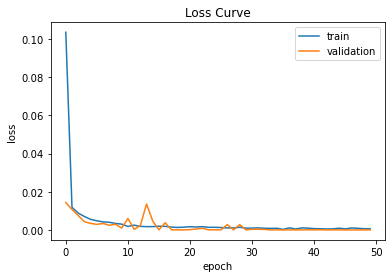

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


## Neural Network - Single Label

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# Feature and Target Setup
features = df.drop('Offense_Rank', axis=1)
target = df['Offense_Rank']

# Convert target to categorical (one-hot encoding) if it's not ordinal
target_encoded = to_categorical(target)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Compile and Train Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer, 'softmax' for multi-class classification

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/Users/lindseysullivan/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8906/8906 ━━━━━━━━━━━━━━━━━━━━ 4s 398us/step - accuracy: 0.4990 - loss: 1.3261 - val_accuracy: 0.5339 - val_loss: 1.2088
Epoch 2/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 378us/step - accuracy: 0.5333 - loss: 1.2049 - val_accuracy: 0.5445 - val_loss: 1.1889
Epoch 3/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 386us/step - accuracy: 0.5441 - loss: 1.1821 - val_accuracy: 0.5469 - val_loss: 1.1786
Epoch 4/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 385us/step - accuracy: 0.5470 - loss: 1.1746 - val_accuracy: 0.5477 - val_loss: 1.1780
Epoch 5/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 377us/step - accuracy: 0.5487 - loss: 1.1681 - val_accuracy: 0.5497 - val_loss: 1.1704
Epoch 6/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 387us/step - accuracy: 0.5481 - loss: 1.1719 - val_accuracy: 0.5493 - val_loss: 1.1723
Epoch 7/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 379us/step - accuracy: 0.5509 - loss: 1.1634 - val_accuracy: 0.5509 - val_loss: 1.1721
Epoch 8/50
8906/8906 ━━━━━━━━━━━━━━━━━━━━ 3s 387us/step - accuracy: 0.5522 - loss: 1.16

### Evaluate Model

In [24]:
# Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Model accuracy: {accuracy:.4f}')



2784/2784 ━━━━━━━━━━━━━━━━━━━━ 1s 234us/step - accuracy: 0.5555 - loss: 1.1772
Model accuracy: 0.5542


### Loss Curve

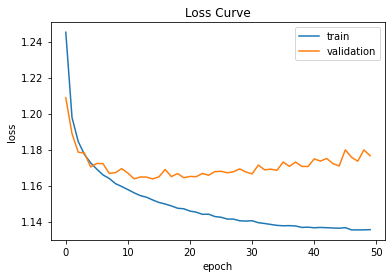

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
